#Mounting Colab & Reading Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/train_food.zip" -d "/content/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/train_food_classification/pizza/pizza1182.jpg  
  inflating: /content/train_food_classification/pizza/pizza1183.jpg  
  inflating: /content/train_food_classification/pizza/pizza1184.jpg  
  inflating: /content/train_food_classification/pizza/pizza1185.jpg  
  inflating: /content/train_food_classification/pizza/pizza1186.jpg  
  inflating: /content/train_food_classification/pizza/pizza1187.jpg  
  inflating: /content/train_food_classification/pizza/pizza1188.jpg  
  inflating: /content/train_food_classification/pizza/pizza1189.jpg  
  inflating: /content/train_food_classification/pizza/pizza119.jpg  
  inflating: /content/train_food_classification/pizza/pizza1190.jpg  
  inflating: /content/train_food_classification/pizza/pizza1191.jpg  
  inflating: /content/train_food_classification/pizza/pizza1192.jpg  
  inflating: /content/train_food_classification/pizza/pizza1193.jpg  
  inflating: /content/train_food_classif

In [3]:
!unzip "/content/drive/MyDrive/test_food.zip" -d "/content/"

Archive:  /content/drive/MyDrive/test_food.zip
   creating: /content/test_food_classification/
   creating: /content/test_food_classification/softdrink/
  inflating: /content/test_food_classification/softdrink/softdrink100 - Copy.jpg  
  inflating: /content/test_food_classification/softdrink/softdrink1004.jpg  
  inflating: /content/test_food_classification/softdrink/softdrink1007.jpg  
  inflating: /content/test_food_classification/softdrink/softdrink1012.jpg  
  inflating: /content/test_food_classification/softdrink/softdrink1013.jpg  
  inflating: /content/test_food_classification/softdrink/softdrink1017.jpg  
  inflating: /content/test_food_classification/softdrink/softdrink1018.jpg  
  inflating: /content/test_food_classification/softdrink/softdrink1019.jpg  
  inflating: /content/test_food_classification/softdrink/softdrink1020.jpg  
  inflating: /content/test_food_classification/softdrink/softdrink1021.jpg  
  inflating: /content/test_food_classification/softdrink/softdrink1022.

#Visualization and Data Augmentation

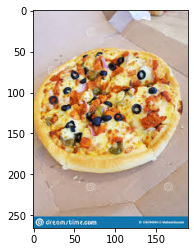

In [4]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/test_food_classification/pizza/pizza523.jpg"))

In [5]:
a=plt.imread('/content/test_food_classification/pizza/pizza523.jpg')
a.shape

(266, 189, 3)

In [6]:
import os

In [7]:
labels = os.listdir('/content/train_food_classification')
labels

['softdrink', 'pizza']

In [8]:
# Dimension of our images.
img_width, img_height = 150, 150

#Setting up the directories
train_data_dir = '/content/train_food_classification'
validation_data_dir ='/content/test_food_classification'

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
#Setting up the batchsizes.
nb_train_samples = 10452
nb_validation_samples = 2070
epochs = 30
batch_size =32

In [11]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(rescale=1./ 255, shear_range=0.2,vertical_flip=True, rotation_range=30, zoom_range=0.2, horizontal_flip=True)

#this generates batches of augment data for training
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 10452 images belonging to 2 classes.


In [12]:
# this is the augmentation configuration we will use for validating
val_datagen = ImageDataGenerator(rescale=1./255)

#this generates batches of augment data for validating
validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2070 images belonging to 2 classes.


#Building Model

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,  BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

In [14]:
input_shape = (img_width, img_height, 3)

In [28]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation= 'elu', input_shape = input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3,3), activation= 'elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64,(3,3), activation= 'elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, (3,3),  activation= 'elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(128,(3,3), activation= 'elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))



model.add(Flatten())
model.add(Dense(64, activation= 'relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation= 'sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_16 (Batc (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 64)       

In [29]:
#configuring the model
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#Model Training

In [30]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
326/326 [==============================] - 44s 130ms/step - loss: 0.4899 - accuracy: 0.8247 - val_loss: 1.0705 - val_accuracy: 0.6758
Epoch 2/30
326/326 [==============================] - 42s 127ms/step - loss: 0.3018 - accuracy: 0.8852 - val_loss: 0.1694 - val_accuracy: 0.9404
Epoch 3/30
326/326 [==============================] - 42s 128ms/step - loss: 0.2553 - accuracy: 0.9027 - val_loss: 0.4399 - val_accuracy: 0.8174
Epoch 4/30
326/326 [==============================] - 42s 127ms/step - loss: 0.2140 - accuracy: 0.9252 - val_loss: 0.1797 - val_accuracy: 0.9277
Epoch 5/30
326/326 [==============================] - 42s 128ms/step - loss: 0.1914 - accuracy: 0.9289 - val_loss: 0.2246 - val_accuracy: 0.9053
Epoch 6/30
326/326 [==============================] - 41s 126ms/step - loss: 0.1894 - accuracy: 0.9314 - val_loss: 0.1273 - val_accuracy: 0.9639
Epoch 7/30
326/326 [==============================] - 41s 126ms/step - loss: 0.1910 - accuracy: 0.9281 - val_loss: 0.2912 - val_ac

#Saving the parameters for further deployment

In [31]:
#to save the weights in the model as a HDF file
model.save_weights('food_classifier_first_try.h5')

In [32]:
#to save the architecture of the model as a json file

with open('model_architecture_food_classifier.json','w') as f:
    f.write(model.to_json())

#Model Evaluation

In [34]:
scoreSeg = model.evaluate_generator(validation_generator, 400)
print("Accuracy = ",scoreSeg[1]*100,'%')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Accuracy =  94.34782862663269 %


#Loading saved parameter for use

In [35]:
from keras.models import load_model
from keras.models import model_from_json

In [36]:
# Model reconstruction from JSON file
with open('/content/model_architecture_food_classifier.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('/content/food_classifier_first_try.h5')

#Prediction Testing

In [38]:
print(train_generator.class_indices)

{'pizza': 0, 'softdrink': 1}


In [44]:
#Here I took two random images from dataset and did test the prediction
import numpy as np
from keras.preprocessing import image  #image module helps to load image
test_image=image.load_img('/content/test_food_classification/pizza/pizza1215.jpg',target_size=(150,150))
print(test_image.size)
test_image=image.img_to_array(test_image) #returns a 3D numpy array
print(test_image.shape)
test_image=np.expand_dims(test_image,axis=0) #CNN expects another dimension for the batch so we have to add that dimension at index=0 specified by axis=0 
print(test_image.shape)
result=model.predict(test_image)
print(result)
if result[0][0]==1.0:
  prediction='This is Softdrink'
else:
  prediction='This is Pizza'
print(prediction)

(150, 150)
(150, 150, 3)
(1, 150, 150, 3)
[[0.]]
This is Pizza


In [43]:
test_image=image.load_img('/content/test_food_classification/softdrink/softdrink1052 - Copy.jpg',target_size=(150,150))
print(test_image.size)
test_image=image.img_to_array(test_image) #returns a 3D numpy array
print(test_image.shape)
test_image=np.expand_dims(test_image,axis=0) #CNN expects another dimension for the batch so we have to add that dimension at index=0 specified by axis=0 
print(test_image.shape)
result=model.predict(test_image)
print(result)
if result[0][0]==1.0:
  prediction='This is Softdrink'
else:
  prediction='This is Pizza'
print(prediction)

(150, 150)
(150, 150, 3)
(1, 150, 150, 3)
[[1.]]
This is Softdrink
